<a href="https://colab.research.google.com/github/gnitnaw/Programs/blob/master/Chapter5/logreg1d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!python --version

Python 3.7.12


## Import modules


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from  numpy.linalg import lstsq
print(np.__version__)

1.19.5


## Set random seed

In [ ]:
np.random.seed(12)
#np.random.seed(1200)

## Original program

[-0.57996762  2.68644328]
[-1.2453366   4.63387142]
[-2.01429132  6.99135857]
[-2.83178712  9.67239122]
[-3.58878779 12.26956328]
[-4.07398379 13.96347105]
[-4.20865067 14.4373281 ]
[-4.21634608 14.46453848]
[-4.21636915 14.46462029]


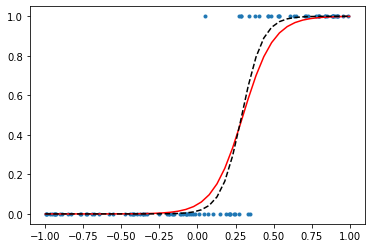

In [ ]:
n = 100                                      # sample size
x = (2*np.random.rand(n)-1).reshape((n,1))  # explanatory variables
beta = np.array([-3, 10])
Xmat = np.hstack((np.ones((n,1)), x))
p = 1/(1 + np.exp(-Xmat @ beta))

y = np.random.binomial(1,p,n)                # response variables

# initial guess
betat = lstsq((Xmat.T @ Xmat),Xmat.T @ y, rcond=None)[0]

grad = np.array([2,1])                             # gradient 

while (np.sum(np.abs(grad)) > 1e-5) :      # stopping criteria
    mu = 1/(1+np.exp(-Xmat @ betat))
    # gradient
    delta = (mu - y).reshape((n,1))
    grad = np.sum(np.multiply( np.hstack((delta,delta)),Xmat), axis=0).T
    # Hessian
    H = Xmat.T @ np.diag(np.multiply(mu,(1-mu))) @ Xmat    
    betat = betat - lstsq(H,grad,rcond=None)[0]
    print(betat)
    
plt.plot(x,y, '.') # plot data

xx = np.linspace(-1,1,40).reshape((40,1))
XXmat = np.hstack( (np.ones((len(xx),1)), xx)) 
yy = 1/(1 + np.exp(-XXmat @ beta))
plt.plot(xx,yy,'r-')                      #true logistic curve
yy = 1/(1 + np.exp(-XXmat @ betat));
plt.plot(xx,yy,'k--')                               # estimated curve
